Import 


In [15]:
import pandas as pd
from sqlalchemy import create_engine
import sqlite3
import os 
from sqlalchemy import create_engine, Column, String
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker
import requests
import io
import matplotlib.pyplot as plt
import numpy as np


Creating Local Database


In [2]:
#Defines SQLite Database Path
db_path = 'sqlite:///Universe.db'
engine = create_engine(db_path)

dc_url = "https://raw.githubusercontent.com/kejbrown/SuperheroUniverseAnaylsis/master/DC%20Data.csv"
marvel_url = "https://raw.githubusercontent.com/kejbrown/SuperheroUniverseAnaylsis/master/Marvel%20Data.csv"
download = requests.get(dc_url).content
download_1 = requests.get(marvel_url).content
#read CSV data 
df_dc = pd.read_csv(io.StringIO(download.decode('utf-8')))
df_marvel = pd.read_csv(io.StringIO(download_1.decode('utf-8')))

#Write data to SQLite Database 
df_dc.to_sql('dc_data_1', engine, if_exists='replace')
df_marvel.to_sql('marvel_data_1',engine, if_exists='replace')



16376

Join Tables 

In [14]:
import pandas as pd
from sqlalchemy import create_engine

# Create a SQLAlchemy engine
db_path = 'sqlite:///Universe.db'
engine = create_engine(db_path)

# Read DC and Marvel tables from the database
df_dc = pd.read_sql('SELECT * FROM dc_data_1', engine)
df_marvel = pd.read_sql('SELECT * FROM marvel_data_1', engine)

#Drop duplicate columns before concatenating
df_dc = df_dc.drop(columns=['Year'], errors='ignore')
df_marvel = df_marvel.drop(columns=['Year'], errors='ignore')


# Add a 'universe' column to identify the universe of each row
df_dc['universe'] = 'DC'
df_marvel['universe'] = 'Marvel'
           
 
 # Concatenate the DataFrames vertically
df_combined = pd.concat([df_dc, df_marvel], ignore_index=True)

# Write the modified DataFrame to a new table in the database
df_combined.to_sql('combined_universe', engine, index=False, if_exists='replace')


23272

In [4]:
df_combined

,index,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,universe
0,0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,None,Living Characters,3093.0,"1939, May",1939.0,DC
1,1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,None,Living Characters,2496.0,"1986, October",1986.0,DC
2,2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,None,Living Characters,1565.0,"1959, October",1959.0,DC
3,3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,None,Living Characters,1316.0,"1987, February",1987.0,DC
4,4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,None,Living Characters,1237.0,"1940, April",1940.0,DC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23267,16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,None,Living Characters,NaN,None,NaN,Marvel
23268,16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,None,Living Characters,NaN,None,NaN,Marvel
23269,16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,None,Living Characters,NaN,None,NaN,Marvel
23270,16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Secret Identity,Neutral Characters,None,None,Male Characters,None,Living Characters,NaN,None,NaN,Marvel


Clean Data


In [5]:
 #Specify unwanted columns and remove them
unwanted_columns = ['page_id', 'urlslug', 'GSM', 'APPEARANCES', 'YEAR']  # Replace with your actual column names
df_combined = df_combined.drop(columns=unwanted_columns, errors='ignore')

# Write the modified DataFrame to a new table in the database
df_combined.to_sql('combined_universe', engine, index=False, if_exists='replace')

23272

In [6]:
df_combined

,index,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,FIRST APPEARANCE,universe
0,0,Batman (Bruce Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,"1939, May",DC
1,1,Superman (Clark Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,"1986, October",DC
2,2,Green Lantern (Hal Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,"1959, October",DC
3,3,James Gordon (New Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Living Characters,"1987, February",DC
4,4,Richard Grayson (New Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,"1940, April",DC
...,...,...,...,...,...,...,...,...,...,...
23267,16371,Ru'ach (Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,Living Characters,None,Marvel
23268,16372,Thane (Thanos' son) (Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,Living Characters,None,Marvel
23269,16373,Tinkerer (Skrull) (Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,Living Characters,None,Marvel
23270,16374,TK421 (Spiderling) (Earth-616),Secret Identity,Neutral Characters,None,None,Male Characters,Living Characters,None,Marvel


In [7]:
#Specify the column and remove rows where "ALIGN" is "Bad Characters"
column_to_check = 'ALIGN'  # Replace with the actual column name
value_to_remove = 'Neutral Characters' 
df_combined = df_combined[df_combined[column_to_check] != value_to_remove]

# Write the modified DataFrame to a new table in the database
df_combined.to_sql('combined_universe', engine, index=False, if_exists='replace')

20499

In [8]:
# Specify the column and remove rows with NULL values in "First Appearance"
column_to_check = 'SEX'  # Replace with the actual column name
df_combined = df_combined.dropna(subset=[column_to_check])

# Write the modified DataFrame to a new table in the database
df_combined.to_sql('combined_universe', engine, index=False, if_exists='replace')

19641

In [9]:
# Specify the column and remove rows with NULL values in "First Appearance"
column_to_check = 'FIRST APPEARANCE'  # Replace with the actual column name
df_combined = df_combined.dropna(subset=[column_to_check])

# Write the modified DataFrame to a new table in the database
df_combined.to_sql('combined_universe', engine, index=False, if_exists='replace')

18952

In [10]:
# Specify the column and remove rows with NULL values in "First Appearance"
column_to_check = 'ALIGN'  # Replace with the actual column name
df_combined = df_combined.dropna(subset=[column_to_check])

# Write the modified DataFrame to a new table in the database
df_combined.to_sql('combined_universe', engine, index=False, if_exists='replace')

15919

Display Data

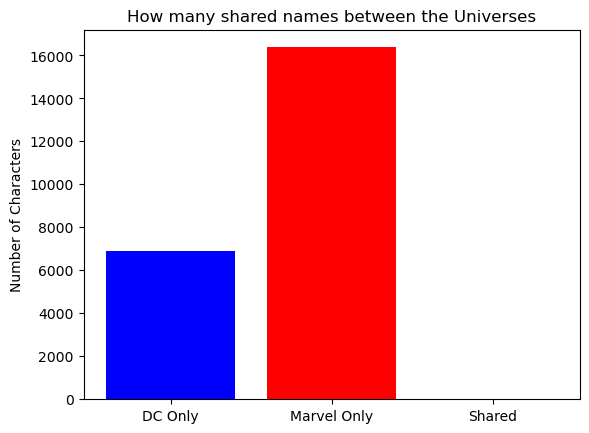

In [11]:

# Read DC and Marvel tables from the database
df_dc = pd.read_sql('SELECT * FROM dc_data_1', engine)
df_marvel = pd.read_sql('SELECT * FROM marvel_data_1', engine)


# Extract superhero names from both DataFrames
dc_names = set(df_dc['name'])
marvel_names = set(df_marvel['name'])

# Find common superhero names
shared_names = dc_names.intersection(marvel_names)

# Count the number of characters with shared names
shared_names_count = df_dc[df_dc['name'].isin(shared_names)].shape[0]

# Plotting a bar chart
labels = ['DC Only', 'Marvel Only', 'Shared']
sizes = [len(dc_names - shared_names), len(marvel_names - shared_names), shared_names_count]

fig, ax = plt.subplots()
ax.bar(labels, sizes, color=['blue', 'red', 'purple'])
ax.set_ylabel('Number of Characters')
ax.set_title( 'How many shared names between the Universes')
plt.show()


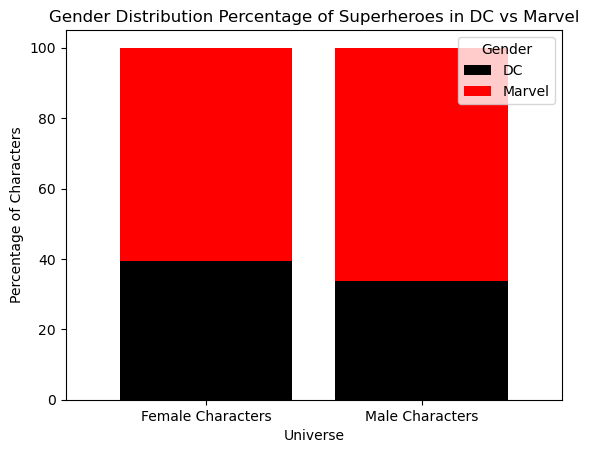

In [12]:
# Filter only Male and Female categories
df_filtered = df_combined[df_combined['SEX'].isin(['Male Characters', 'Female Characters'])]

# Count the number of male and female characters for both DC and Marvel using the 'Name' column
gender_counts = df_filtered.groupby(['SEX', 'universe'])['name'].count().unstack(fill_value=0)

# Calculate the percentage
gender_percentage = gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100

# Plotting a stacked bar chart
gender_percentage.plot(kind='bar', stacked=True, color=['black', 'red'], width=0.8)
plt.xlabel('Universe')
plt.ylabel('Percentage of Characters')
plt.title('Gender Distribution Percentage of Superheroes in DC vs Marvel')
plt.legend(title='Gender', loc='upper right')
plt.xticks(rotation=0)
plt.show()


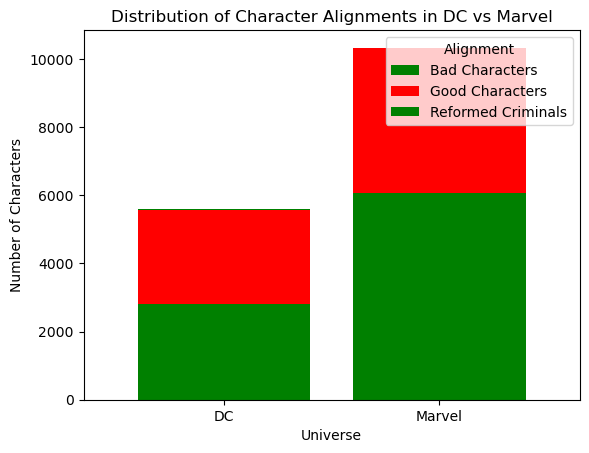

In [13]:
df_filtered = df_combined[df_combined['ALIGN'] != 'Reformed Criminals']

# Filter columns to include only relevant ones for the pivot table
df_alignment = df_combined[['ALIGN', 'universe']]

# Create a pivot table
pivot_table = pd.pivot_table(df_alignment, index='universe', columns='ALIGN', aggfunc='size', fill_value=0)

# Plotting a stacked bar chart
pivot_table.plot(kind='bar', stacked=True, color=['green', 'red'], width=0.8)
plt.xlabel('Universe')
plt.ylabel('Number of Characters')
plt.title('Distribution of Character Alignments in DC vs Marvel')
plt.legend(title='Alignment', loc='upper right')
plt.xticks(rotation=0)
plt.show()